In [1]:
#Read in the data from the files.
from mnist import MNIST

mndata = MNIST('mnist')

trainData, trainLabel = mndata.load_training()

testData, testLabel = mndata.load_testing()

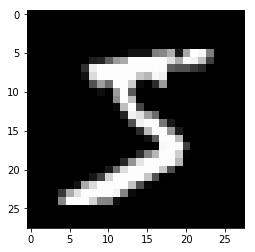

In [2]:
#Show a templete of digits.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time


img = np.reshape(trainData[0],(28,28))
plt.figure()
plt.imshow(img, cmap=cm.gray)
plt.show()

In [89]:
# Tack the bias parameter w_0 = 1 at the beginning of each data.
def FeatureBuilder(data):
    feat = []
    feat.append(1)
    for t in data:
        feat.append(t)
    return feat


xTrain = [FeatureBuilder(d) for d in trainData[:20000]]
yTrain = trainLabel[:20000]
xTest = [FeatureBuilder(d) for d in testData[-2000:]]
yTest = testLabel[-2000:]

xTrain = np.asarray(xTrain)
yTrain = np.expand_dims(np.asarray(yTrain),axis = 1)
xTest = np.asarray(xTest)
yTest = np.expand_dims(np.asarray(yTest),axis = 1)

# Logistic Regression via Gradient Descent

In [102]:
# Define data extraction function
def dataExtract(data, label, target1, target2):
    dataEx = []
    labelEx = []
    for x, y in zip(data, label):
        if y == target1:
            dataEx.append(x)
            labelEx.append(1)
        if y == target2:
            dataEx.append(x)
            labelEx.append(0)
    dataEx = np.asarray(dataEx)
    labelEx = np.expand_dims(np.asarray(labelEx),axis = 1)
    return dataEx, labelEx

In [249]:
# Logistic Regression via Gradient Descent
import numpy as np

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def calculateLoss(data, label, weight, lam, regType):
    loss = -1.0 * np.sum(label * np.log(sigmoid(np.dot(data, weight)))\
                         + (1 - label)* np.log(1 - sigmoid(np.dot(data, weight))))
    loss = loss / len(data)
    if regType == 'l1':
        loss += lam * np.linalg.norm(weight, ord = 1)
    if regType =='l2':
        loss += lam * np.dot(weight.T, weight)
    return loss

def pecisionRate(data, label, weight):
    pred = sigmoid(np.dot(data, weight))
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    rate = 1.0 * np.sum([a == b for (a, b) in zip(pred, label)]) / len(label)
    return rate

def logisticRegression(trainData, trainLabel, testData, testLabel, lr = 1e-3,\
                       maxIter = 500, T = 500, lam = 0, regType = 'l2', fitOnly = 1):
    start = time.clock()
    if fitOnly == 0:
        correctTrain = []
        correctValid = []
        correctTest = []
        lossTrain = []
        lossTest = []
        lossValid = []
    
    # Normalize the pixel values (VERY IMPORTANT)
    lossValid = []
        
    trainData = trainData / 255.0;
    testData = testData / 255.0;
    
    validRate = int(len(trainData) / 10)
    
    trainD = trainData[:validRate]
    trainL = trainLabel[:validRate]
    
    validD = trainData[validRate:]
    validL = trainLabel[validRate:]
    
    w_0 = np.zeros((len(trainD[0]),1))
    it = 0
    
    while it <= maxIter:
        lr1 = lr / (1.0 + it / T)
        # Gradient Descent
        derE = np.expand_dims(np.sum((sigmoid(np.dot(trainD, w_0)) - trainL) * trainD, axis = 0), axis = 1)
        # Regulariztion
        if regType == 'l1':
            derC = w_0
            derC[derC > 0] = 1
            derC[derC < 0] = -1
        if regType == 'l2':
            derC = 2.0 * w_0
        derJ = derE + lam * derC
        w_0 -= lr1 * derJ
        if fitOnly == 0:
            # Calculate loss on Training set
            lossT = calculateLoss(trainD, trainL, w_0, lam, regType)[0][0]
            lossTrain.append(lossT)
            # Calculate loss on Validation set
            lossV = calculateLoss(validD, validL, w_0, lam, regType)[0][0]
            lossValid.append(lossV)
            # Calculate loss on Test set
            loss = calculateLoss(testData, testLabel, w_0, lam, regType)[0][0]
            lossTest.append(loss)
            # Calculate percent correct classification on Training set
            rateT = pecisionRate(trainD, trainL, w_0)
            correctTrain.append(rateT)
            # Calculate percent correct classification on Validation set
            rateV = pecisionRate(validD, validL, w_0)
            correctValid.append(rateV)
            # Calculate percent correct classification on Test set
            rate = pecisionRate(testData, testLabel, w_0)
            correctTest.append(rate)
        else:
            # Calculate loss on Validation set
            lossV = calculateLoss(validD, validL, w_0, lam, regType)
            lossValid.append(lossV)
        if it % 10 == 0:
            print (lossV)
        it += 1
    print ('done')
    elapse = time.clock()-start
    if fitOnly == 1:
        return w_0, lossBest, rateBest, elapse
    else:
        return w_0, lossTrain, lossValid, lossTest,correctTrain, correctValid, correctTest, elapse

In [190]:
yhot = oneHot(yTest)
yhot.shape

(2000, 10)

In [200]:
w_0 = np.zeros((len(xTrain[0]), 10))
w_0.shape

(785, 10)

0.36767888512
0.170091403519
0.14879237675
0.139775515694
0.134909740105
0.131955094944
0.130050763047
0.128787136756
0.127940963497
0.127378917105
0.127016241386
done
2.282334609183181


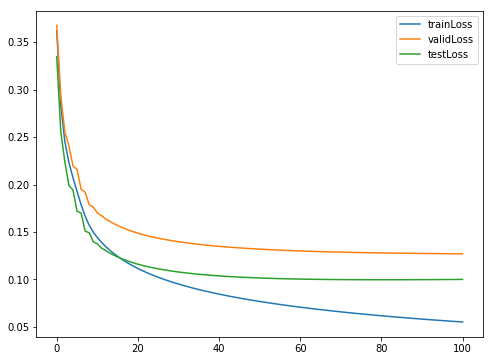

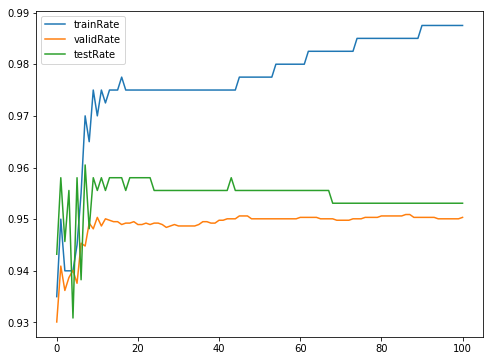

In [178]:
# Find out two categories: 2's and 3's
xTrain23, yTrain23 = dataExtract(xTrain, yTrain, 2, 3)
xTest23, yTest23 = dataExtract(xTest, yTest, 2, 3)

# loss function without regularization
coeff23, ETrain23, EValid23, ETest23, RTrain23, RValid23, RTest23, Time = logisticRegression(xTrain23, yTrain23, xTest23, yTest23, 0.001, 100, 500, fitOnly = 0)

print (Time)
x = [i for i in range(len(ETrain23))]
plt.figure(figsize = (8,6))
trainLoss, = plt.plot(x, ETrain23)
validLoss, = plt.plot(x, EValid23)
testLoss, = plt.plot(x, ETest23)
plt.legend([trainLoss, validLoss, testLoss], ['trainLoss', 'validLoss', 'testLoss'])
plt.show()

x = [i for i in range(len(RTrain23))]
plt.figure(figsize = (8,6))
trainRate, = plt.plot(x, RTrain23)
validRate, = plt.plot(x, RValid23)
testRate, = plt.plot(x, RTest23)
plt.legend([trainRate, validRate, testRate], ['trainRate', 'validRate', 'testRate'])
plt.show()

0.435724747758
0.206164977992
0.188427346618
0.185176984193
0.185921961719
0.188405383341
0.191730297236
0.195479436865
0.199437819232
0.203486662498
0.207557082166
done
2.2155476168045425


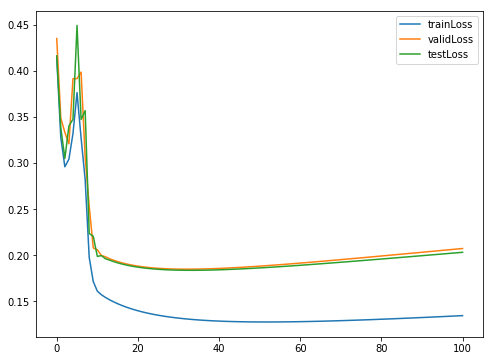

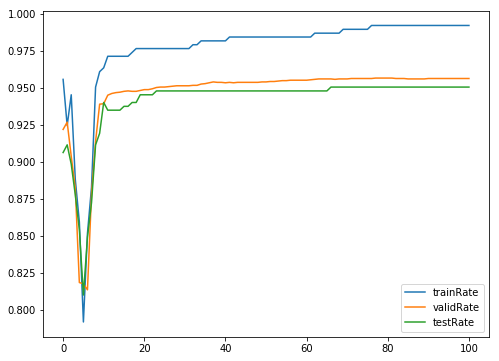

In [177]:
# Find out two categories: 2's and 8's
xTrain28, yTrain28 = dataExtract(xTrain, yTrain, 2, 8)
xTest28, yTest28 = dataExtract(xTest, yTest, 2, 8)

# loss function without regularization
coeff28, ETrain28, EValid28, ETest28, RTrain28, RValid28, RTest28, Time = logisticRegression(xTrain28, yTrain28, xTest28, yTest28, 0.001, 100, 500, .01, 'l2', 0)
print (Time)
x = [i for i in range(len(ETrain28))]
plt.figure(figsize = (8,6))
trainLoss, = plt.plot(x, ETrain28)
validLoss, = plt.plot(x, EValid28)
testLoss, = plt.plot(x, ETest28)
plt.legend([trainLoss, validLoss, testLoss], ['trainLoss', 'validLoss', 'testLoss'])
plt.show()

x = [i for i in range(len(RTrain28))]
plt.figure(figsize = (8,6))
trainRate, = plt.plot(x, RTrain28)
validRate, = plt.plot(x, RValid28)
testRate, = plt.plot(x, RTest28)
plt.legend([trainRate, validRate, testRate], ['trainRate', 'validRate', 'testRate'])
plt.show()

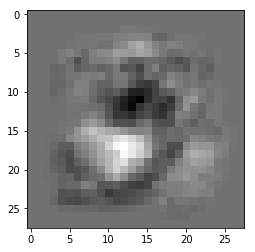

In [179]:
img = np.reshape(coeff23[1:],(28,28))
plt.figure()
plt.imshow(img, cmap=cm.gray)
plt.show()

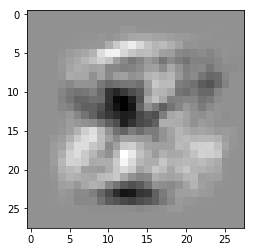

In [180]:
img = np.reshape(coeff28[1:],(28,28))
plt.figure()
plt.imshow(img, cmap=cm.gray)
plt.show()

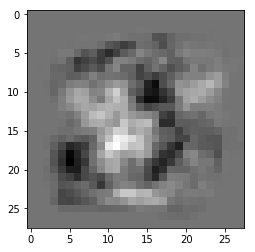

In [181]:
img = np.reshape(coeff23[1:] - coeff28[1:],(28,28))
plt.figure()
plt.imshow(img, cmap=cm.gray)
plt.show()

# Regularization

In [186]:
# loss function without regularization
for lam in [0.0001,0.001,0.01]:
    coeff23Reg, ETrain23Reg, EValid23Reg, ETest23Reg, RTrain23Reg, RValid23Reg, RTest23Reg, Time\
    = logisticRegression(xTrain23, yTrain23, xTest23, yTest23, 0.001, 100, 500, lam, 'l2',0)
print (Time)

0.367697909505
0.170258691518
0.149055078366
0.140116564127
0.135319420497
0.132426991762
0.130580252492
0.129370671036
0.128575684395
0.128062430488
0.127746479034
done
0.367869128968
0.171764255334
0.151419305238
0.14318583318
0.139006281829
0.136673691562
0.135345164043
0.134621852838
0.134287402087
0.134213127342
0.134317532296
done
0.369581323596
0.186817104203
0.17505289668
0.173862012612
0.175848952287
0.179103930072
0.182945467143
0.187071684021
0.191328392438
0.195628769345
0.199920735717
done
2.3171501028441526


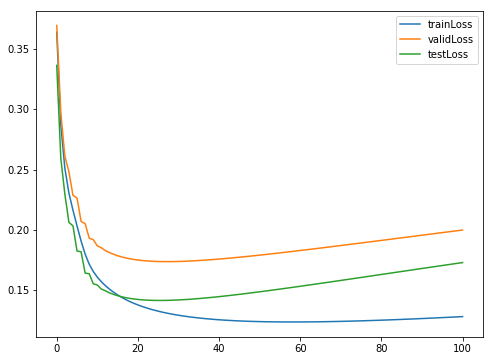

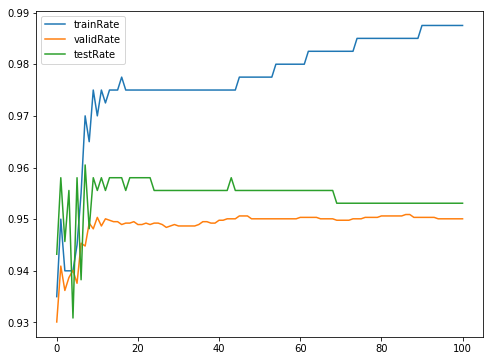

In [187]:
x = [i for i in range(len(ETrain23Reg))]
plt.figure(figsize = (8,6))
trainLoss, = plt.plot(x, ETrain23Reg)
validLoss, = plt.plot(x, EValid23Reg)
testLoss, = plt.plot(x, ETest23Reg)
plt.legend([trainLoss, validLoss, testLoss], ['trainLoss', 'validLoss', 'testLoss'])
plt.show()

x = [i for i in range(len(RTrain23Reg))]
plt.figure(figsize = (8,6))
trainRate, = plt.plot(x, RTrain23Reg)
validRate, = plt.plot(x, RValid23Reg)
testRate, = plt.plot(x, RTest23Reg)
plt.legend([trainRate, validRate, testRate], ['trainRate', 'validRate', 'testRate'])
plt.show()

# Softmax Regression

In [254]:
a = np.dot(xTest, w_0)
y = np.exp(a) / np.expand_dims(np.sum(np.exp(a), axis=1), axis=1)
np.expand_dims(xTest[0],axis = 0).shape

(1, 785)

In [250]:
coeff23.shape

(785, 1)

In [257]:
def calculateLoss(data, label, weight, lam, regType):
    loss = 0
    for i in range(len(label)):
        a = np.dot(data, weight)
        y = np.exp(a) / np.expand_dims(np.sum(np.exp(a), axis=1), axis=1)
        loss -= np.sum(label * np.log(y))
    loss = loss / len(data)
    if regType == 'l1':
        loss += lam * np.sum(np.abs(weight))
    if regType =='l2':
        loss += lam * np.sum(np.power(weight, 2))
    return loss

def pecisionRate(data, label, weight):
    correct = 0
    for i in range(len(data)):
        a = np.dot(trainD, w_0)
        prediction = np.where(a == np.max(a))[0][0]
        if label[i, prediction] == 1:
            correct += 1
    rate = 1.0 * correct / len(label)
    return rate

def oneHot(label):
    labelHot = np.zeros((len(label),len(np.unique(label))))
    for i in range(len(label)):
        labelHot[i,label[i]] = 1
    return labelHot

def softmaxRegression(trainData, trainLabel, testData, testLabel, lr = 1e-3,\
                       maxIter = 500, T = 500, lam = 0, regType = 'l2', fitOnly = 1):
    classNum = len(np.unique(trainLabel))
    trainLabel = oneHot(trainLabel)
    testLabel = oneHot(testLabel)
    
    if fitOnly == 0:
        lossTrain = []
        lossValid = []
        lossTest = []
        correctTrain = []
        correctValid = []
        correctTest = []
    
    # Normalize the pixel values (VERY IMPORTANT)
    trainData = trainData / 255.0;
    testData = testData / 255.0;
    
    validRate = int(len(trainData) / 10)
    
    trainD = trainData[:validRate]
    trainL = trainLabel[:validRate]
    
    validD = trainData[validRate:]
    validL = trainLabel[validRate:]
    
    w_0 = np.zeros((len(trainData[0]), classNum))
    it = 0
    
    while it <= maxIter:
        lr1 = lr / (1.0 + it / T)
        # Gradient Descent
        a = np.dot(trainD, w_0)
        y = np.exp(a) / np.expand_dims(np.sum(np.exp(a), axis=1), axis=1)
        y = y - trainL
        derE = np.zeros((len(trainD[0]), classNum))
        for i in range(len(trainD)):
            derE += np.dot(np.expand_dims(y[i],axis = 1), np.expand_dims(trainD[i],axis = 0)).T
        # Regulariztion
        if regType == 'l1':
            derC = w_0
            derC[C > 0] = 1
            derC[C < 0] = -1
        if regType == 'l2':
            derC = 2.0 * w_0
        derJ = derE + lam * derC
        w_0 -= lr1 * derJ
        if fitOnly == 0:
            # Calculate loss on Training set
            lossT = calculateLoss(trainD, trainL, w_0, lam, regType)
            lossTrain.append(lossT)
            # Calculate loss on Validation set
            lossV = calculateLoss(validD, validL, w_0, lam, regType)
            lossValid.append(lossV)
            # Calculate loss on Test set
            loss = calculateLoss(testData, testLabel, w_0, lam, regType)
            lossTest.append(loss)
            # Calculate percent correct classification on Training set
            rateT = pecisionRate(trainD, trainL, w_0)
            correctTrain.append(rateT)
            # Calculate percent correct classification on Validation set
            rateV = pecisionRate(validD, validL, w_0)
            correctValid.append(rateV)
            # Calculate percent correct classification on Test set
            rate = pecisionRate(testData, testLabel, w_0)
            correctTest.append(rate)
        else:
            # Calculate loss on Validation set
            lossV = calculateLoss(validD, validL, w_0, lam, regType)
        #if it % 10 == 0:
        print (lossV)
        it += 1
    print ('done')
    if fitOnly == 1:
        return w_0
    else:
        return w_0, lossTrain, lossValid, lossTest,correctTrain, correctValid, correctTest

In [260]:
def inner(x,y):
    return sum([x[i] * y[i] for i in range(len(x))])

def calculateLoss(data, label, weight, lam, regType):
    loss = 0
    for i in range(len(label)):
        a = inner(weight.T, data[i])
        y = np.exp(a) / np.sum(np.exp(a))
        for j in range(len(label[0])):
            if label[i ,j] == 1:
                loss -= np.log(y[j])
    loss = loss / len(data)
    if regType == 'l1':
        loss += lam * np.linalg.norm(weight, ord = 1)
    if regType =='l2':
        loss += lam * np.sum(np.power(weight, 2))
    return loss

def pecisionRate(data, label, weight):
    correct = 0
    for i in range(len(data)):
        a = inner(weight.T, data[i])
        prediction = np.where(a == np.max(a))[0][0]
        if label[i, prediction] == 1:
            correct += 1
    rate = 1.0 * correct / len(label)
    return rate

def oneHot(label):
    labelHot = np.zeros((len(label),len(np.unique(label))))
    for i in range(len(label)):
        labelHot[i,label[i]] = 1
    return labelHot

def softmaxRegression(trainData, trainLabel, testData, testLabel, lr = 1e-3,\
                       maxIter = 500, T = 500, lam = 0, regType = 'l2', fitOnly = 1):
    classNum = len(np.unique(trainLabel))
    trainLabel = oneHot(trainLabel)
    testLabel = oneHot(testLabel)
    
    if fitOnly == 0:
        lossTrain = []
        lossValid = []
        lossTest = []
        correctTrain = []
        correctValid = []
        correctTest = []
    
    # Normalize the pixel values (VERY IMPORTANT)
    trainData = trainData / 255.0;
    testData = testData / 255.0;
    
    validRate = int(len(trainData) / 10)
    
    trainD = trainData[:validRate]
    trainL = trainLabel[:validRate]
    
    validD = trainData[validRate:]
    validL = trainLabel[validRate:]
    
    w_0 = np.zeros((classNum, len(trainData[0])))
    it = 0
    
    while it <= maxIter:
        lr1 = lr / (1.0 + it / T)
        # Gradient Descent
        derE = np.zeros((classNum, len(trainD[0])))
        for i in range(len(trainD)):
            a = inner(w_0.T, trainD[i])
            y = np.exp(a) / np.sum(np.exp(a))
            for j in range(classNum):
                derE[j] += (y - trainL[i])[j] * trainD[i]
        # Regulariztion
        if regType == 'l1':
            C = w_0
            C[C > 0] = 1
            C[C < 0] = -1
        if regType == 'l2':
            C = 2.0 * w_0
        J = derE + lam * C
        w_0 -= lr1 * J
        if fitOnly == 0:
            # Calculate loss on Training set
            lossT = calculateLoss(trainD, trainL, w_0, lam, regType)
            lossTrain.append(lossT)
            # Calculate loss on Validation set
            lossV = calculateLoss(validD, validL, w_0, lam, regType)
            lossValid.append(lossV)
            # Calculate loss on Test set
            loss = calculateLoss(testData, testLabel, w_0, lam, regType)
            lossTest.append(loss)
            # Calculate percent correct classification on Training set
            rateT = pecisionRate(trainD, trainL, w_0)
            correctTrain.append(rateT)
            # Calculate percent correct classification on Validation set
            rateV = pecisionRate(validD, validL, w_0)
            correctValid.append(rateV)
            # Calculate percent correct classification on Test set
            rate = pecisionRate(testData, testLabel, w_0)
            correctTest.append(rate)
        else:
            # Calculate loss on Validation set
            lossV = calculateLoss(validD, validL, w_0, lam, regType)
        #if it % 10 == 0:
        print (lossV)
        it += 1
    print ('done')
    if fitOnly == 1:
        return w_0
    else:
        return w_0, lossTrain, lossValid, lossTest,correctTrain, correctValid, correctTest

In [ ]:
coeff, ETrain, EValid, ETest, RTrain, RValid, RTest= softmaxRegression(xTrain, yTrain, xTest, yTest, 0.0001, 100, 500, 1e-3, 'l2', 1)

2.09792482445
1.92515527006
1.77753707923


# Bestfit Lambda

In [ ]:
def FindBsetfit_lbd (trainData, trainLabel, testData, testLabel, lr, max_iter, T, lbd_rang, iter_step, L):
    lossTest = []
    correctTest = []
    lbd_set = range(lbd_rang[0], lbd_rang[1], iter_step)
    for lbd in lbd_set:
        loss, rate = logisticRegression (trainData, trainLabel, testData, testLabel, lr, max_iter, T, lbd, L)
        lossTest.append(loss)
        correctTest.append(rate)
    bestLoss_idx = lossTest.index(min(lossTest))
    bestRate_idx = correctTest.index(max(correctTest))
    if bestLoss_idx == bestRate_idx:
        return lbd_set[bestLoss_idx]
    else:
        return lbd_set[bestLoss_idx]

# Softmax Regression

In [ ]:
def softmaxRegression (trainData, trainLabel, testData, testLabel, lr = .01, max_iter = 100, T = 500, lbd = .001, L = 'l2', fit = 0):
    w_0 = 